
Colorimetric observer models
============================

For silent substitution we quantify light in terms of photoreceptor excitation by computing a weighted integral:

\begin{equation}
w = \int\limits_{\lambda_1}^{\lambda_2}E(\lambda)V(\lambda)d\lambda
\end{equation}

Where $\lambda_1$ and $\lambda_2$ define the wavelength range, $E(\lambda)$ is the measured light spectrum (radiance or irradiance, in photons or watts), $V(\lambda)$ is the estimated photoreceptor sensitivity function, and $d\lambda$ is the size of the wavelength bins. 

By [CIE S 026/E:2018](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0) convention, when this operation concerns the spectral sensitivity functions of retinal photoreceptors, the resulting measures may be called $\alpha$-opic irradiance, where $\alpha$ denotes the opsin-based photopigment of one of the five photoreceptors (cyanolabe, chlorolabe, erythrolabe, rhodopsin and melanopsin). The example below shows how a measured spectrum is converted to $\alpha$-opic irradiance.

\begin{equation}
w = \sum\limits_{380}^{780}E(\lambda)S_\alpha(\lambda)\Delta\lambda
\end{equation}

![aopic irradiance](../../img/alphaopic_irradiance.svg)

The International Commission on Illumination (CIE) define [average colorimetric observer models](https://cie.co.at/publications/colorimetric-observers) with estimates of the photoreceptor spectral sensitivities for a given age and field size. These estimates are based on decades of research involving predominantly psychophysical methods but also techniques such as microelectrode recording and microspectrophotometry of photoreceptors. The CIE 1964 standard colorimetric observer assumes an age and field size of 32 years and 10&deg;, and is suitable for most situations. 

For silent substitution, it may be preferable to address [inter-observer differences in ocular physiology](07b_prereceptoral_filtering.ipynb) by adjusting the spectral sensitivity functions to account for prereceptoral filtering of incident light by the lens and other ocular media. To support this, *PySilSub* defines colorimetric observer models, which can be passed as an argument when instantiating a `StimulationDevice` or `SilentSubstitutionProblem`. 

*PySilSub*'s observer models are essentially places to store the action spectra for a given observer, but they also have methods for visualising the action spectra.


`pysilsub.observers.StandardColorimetricObserver`
------------------------------------------------------------

This is the standard observer model for a 32-year-old observer and 10&deg; field size. Action spectra are obtained from the [CIE S026/E:2018 toolbox](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0) and normalised in the radiometric system. 

**Note:** For quantities expressed in the spectral photon system, a wavelength-dependent conversion and renormalisation is required to generate applicable action spectra. 

In [1]:
from pysilsub import observers 

observer = observers.StandardColorimetricObserver()
observer.action_spectra


,sc,mc,lc,rh,mel
Wavelength,,,,,
380,0.0,0.000000,0.000000,5.890000e-04,9.181600e-04
381,0.0,0.000000,0.000000,6.650000e-04,1.045600e-03
382,0.0,0.000000,0.000000,7.520000e-04,1.178600e-03
383,0.0,0.000000,0.000000,8.540000e-04,1.322800e-03
384,0.0,0.000000,0.000000,9.720000e-04,1.483800e-03
...,...,...,...,...,...
776,0.0,0.000002,0.000024,1.730000e-07,2.550000e-08
777,0.0,0.000002,0.000023,1.640000e-07,2.420000e-08
778,0.0,0.000002,0.000021,1.550000e-07,2.290000e-08


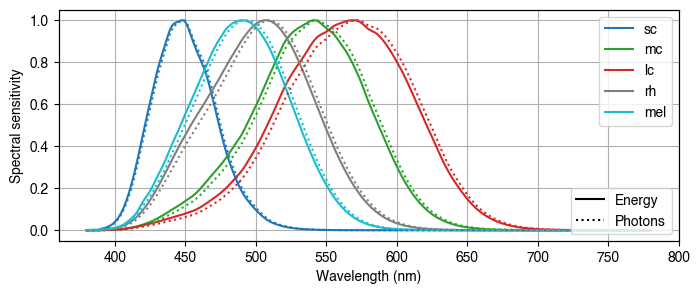

In [2]:
ax = observer.plot_action_spectra(figsize=(8, 3), grid=True, legend=True)

# Conversion for photon system
observer.action_spectra = (
    observer.action_spectra.apply(  # Multiply by wavelength
        lambda col: col * col.index * 5.05e15)  # E = hf
    .apply(lambda col: col / col.max())
)
observer.plot_action_spectra(ax=ax, grid=True, ls=':', legend=False)
twinax = ax.twinx()
twinax.plot([], ls='-', c='k', label='Energy')
twinax.plot([], ls=':', c='k', label='Photons')
twinax.set_yticks([])
twinax.legend(loc='lower right');


`pysilsub.observers.IndividualColorimetricObserver`
-------------------------------------------------------------

This observer class allows for the spectral sensitivities to be adjusted for the effects of age (20-80 years) and field size (1&deg; - 10&deg;).


  - LMS cone fundamentals are constructed from the photopigment absorbance spectra, taking account of the peak axial density of the respective photopigments as well as lens and macular pigment density, in accordance with [CIE 170-1:2006](https://cie.co.at/publications/fundamental-chromaticity-diagram-physiological-axes-part-1).

  - The melanopic action spectrum of the 32-year-old standard observer is adjusted for lens density with a spectral correction function, in accordance with [CIE S026/E:2018](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0). Note that, for consistency, a slightly different lens density function is used for this correction (see [CIE S026/E:2018](https://cie.co.at/publications/cie-system-metrology-optical-radiation-iprgc-influenced-responses-light-0) for more info). 
  
  - The rhodopic action spectrum of the 32-year-old standard observer is currently adjusted in the same way as the melanopic action spectrum, although this may change if a better approach comes to light.


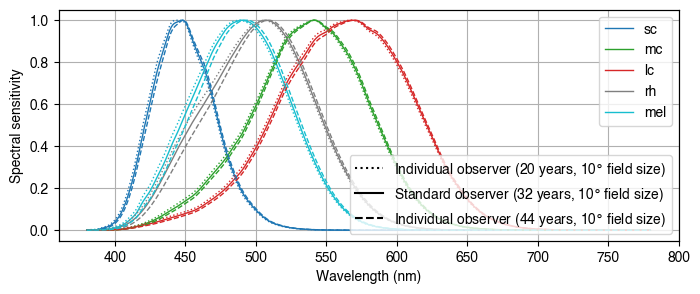

In [3]:
standard_observer = observers.IndividualColorimetricObserver(age=32, field_size=10)
individual_observer_20 = observers.IndividualColorimetricObserver(age=20, field_size=10)
individual_observer_44 = observers.IndividualColorimetricObserver(age=44, field_size=10)

ax = standard_observer.plot_action_spectra(figsize=(8, 3), lw=1, grid=True)

individual_observer_20.plot_action_spectra(ax=ax, ls=':', lw=1, grid=True, legend=False)
individual_observer_44.plot_action_spectra(ax=ax, ls='--', lw=1, grid=True, legend=False)

twinax = ax.twinx()
twinax.plot([], ls=':', c='k', label='Individual observer (20 years, 10$\degree$ field size)')
twinax.plot([], ls='-', c='k', label='Standard observer (32 years, 10$\degree$ field size)')
twinax.plot([], ls='--', c='k', label='Individual observer (44 years, 10$\degree$ field size)')
twinax.set_yticks([])
twinax.legend(loc='lower right');